## Logistic Regression on Advertisement dataset

This ***advertisement user-click*** dataset contains data about users, their demographics like age, city, country, daily time spent on site & whether or not, user clicked on an advertisement flashed on the site.

A logistic regression model has been built to classify whether a user will click on an ad or not, based on their demographic features provided.

Find the dataset here on [Kaggle](https://www.kaggle.com/datasets/gabrielsantello/advertisement-click-on-ad).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
adv_data = pd.read_csv('data/advertisement_click_ads/advertising.csv')

### I. Exploratory Data Analysis

In [3]:
adv_data.shape

(1000, 10)

In [4]:
adv_data.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0


Feature specifications:  
- **Daily Time Spent on Site**- time spent by consumer on the site; in minutes.  
- **Age**- in years.  
- **Daily Internet Usage**- Average time (in minutes) user spends on internet.  
- **Ad Topic Line**- advertisement headline.  
- **Male**- 1 indicates males; 0 indicates non-males. (My assumption- females, trans-people in the 0 category.) 
- **Area income**- Average income of people in the given city of the user.  
- **Timestamp**- date and time when the advertisemt tag was clicked.  
- **Clicked on Ad**- 0 indicates ad not clicked; 1 indicates ad clicked.  


In [5]:
adv_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [6]:
adv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


### Check number of males in the data

In [7]:
adv_data.groupby('Male').size()

Male
0    519
1    481
dtype: int64

### Check whether number of data points in each category is same or not.

In [8]:
adv_data.groupby('Clicked on Ad').size()

Clicked on Ad
0    500
1    500
dtype: int64

### Visualize the distribution of Age feature (check for skewness)

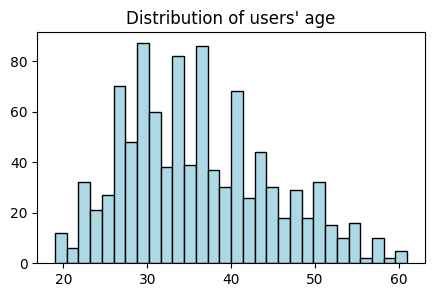

In [20]:
plt.figure(figsize = (5,3))
#ec- edge color of the bars; color- fill color of the bar
plt.hist(adv_data['Age'], bins = 30, ec = "black", color = "lightblue")
plt.title("Distribution of users' age")
plt.show()

In [21]:
adv_data.columns.values

array(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'], dtype=object)

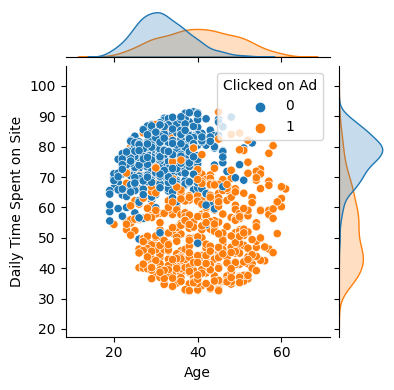

In [58]:
#scatter plot for Age vs daily average time spent on site

sns.jointplot(data = adv_data, x=adv_data['Age'], y=adv_data['Daily Time Spent on Site'], 
              height = 4, hue = 'Clicked on Ad')
plt.show()

Below, I've tried creating same plot as above, but without using Seaborn package. 

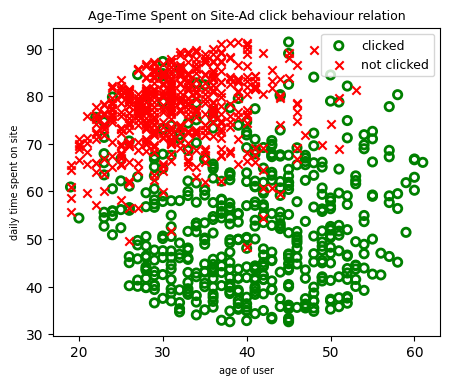

In [13]:
#Same scatter plot as above, without seaborn

#get the row numbers where this column is 1 and where its 0
clicked = adv_data['Clicked on Ad'] == 1
not_clicked = adv_data['Clicked on Ad'] == 0

fig, ax = plt.subplots(1, 1, figsize = (5,4))
ax.scatter(adv_data.loc[clicked,'Age'], adv_data.loc[clicked,'Daily Time Spent on Site'], marker = 'o', label = 'clicked',
          facecolors = 'none', edgecolors = 'green', lw = 2)
ax.scatter(adv_data.loc[not_clicked, 'Age'], adv_data.loc[not_clicked, 'Daily Time Spent on Site'], 
           label = 'not clicked', marker = "x", c = 'red')

ax.set_ylabel('daily time spent on site', fontsize = 7)
ax.set_xlabel('age of user', fontsize = 7)
ax.set_title('Age-Time Spent on Site-Ad click behaviour relation', fontsize = 9)
ax.legend(fontsize = 9)
plt.show()

### Observations from plot above:  

- Users between the ages of 20 to around 39-40 can be put in 2 categories:  
        - Those who spend more time on the site (red cross density is high between 20-40), tend to not click on ads.  
        - Those who spend less time on the site (green circles below) end up clicking on the ads.  
- Users between the ages of 40-60 generally spend less time on the site (as compared to youngsters) and they end up clicking on ads.  

- As of now, it seems like a large number of users who spend 60 minutes or less on the site click on the advertisements.

In [18]:
#Number of users who clicked on ad
users_clicked = adv_data.loc[clicked,]
more_than_1_hour = users_clicked['Daily Time Spent on Site'][users_clicked['Daily Time Spent on Site'] >=60].count()
less_than_1_hour = users_clicked['Daily Time Spent on Site'][users_clicked['Daily Time Spent on Site'] < 60].count()
print(f"users who spent 60 minutes or more and clicked on ad: {more_than_1_hour}")
print(f"users who spent less than 60 minutes and clicked on ad: {less_than_1_hour}")

users who spent 60 minutes or more and clicked on ad: 147
users who spent less than 60 minutes and clicked on ad: 353


In [21]:
#How much time users who skipped ads spent on the site?
users_skipped_ad = adv_data.loc[not_clicked,]
more_than_60 = users_skipped_ad['Daily Time Spent on Site'][users_skipped_ad['Daily Time Spent on Site'] >= 60].count()
less_than_60 = users_skipped_ad['Daily Time Spent on Site'][users_skipped_ad['Daily Time Spent on Site'] < 60].count()
print(f"Number of users who skipped ads and spent 1 hour or more on the site: {more_than_60}")
print(f"Number of users who skipped ads and spent less than 1 hour on site: {less_than_60}")

Number of users who skipped ads and spent 1 hour or more on the site: 486
Number of users who skipped ads and spent less than 1 hour on site: 14


In [22]:
#Total number of users who spent more than 1 hour on the site
total_more_than_60 = adv_data['Daily Time Spent on Site'][adv_data['Daily Time Spent on Site'] >= 60].count()
print(f"Total number of users in the dataset who spent 60 minutes or more on the site: {total_more_than_60}")

Total number of users in the dataset who spent 60 minutes or more on the site: 633


- From above, we can see that out of all 500 users who clicked on ads, 353 of them (70.6%) spent less than 1 hour on the site.  
- Out of all 500 users who DID not click on ads, 486 of them (97.2%) spent 1 hour or more on the site.  
<br>
<br>
- So, the dataset contains details of 1000 users.  
- Out of these 1000 users, 633 of them spent 1 hour or more on the site.  
- Out of these 633 users, 486 of them (\~76.7%) DID NOT click on the ads.  
<br>
<br>
Seems like users spending more than 1 hour on the site, tend to skip ads!

### Does gender of the user show any trend in ad-clicking behaviour? 

Do people of one gender tend to click on ads more than the other.  
<br>
**Note:** Since the column has been named as 'Male' with values 0 or 1, we cannot clearly state that `Male = 0` define females. This data can be about trans people too.  

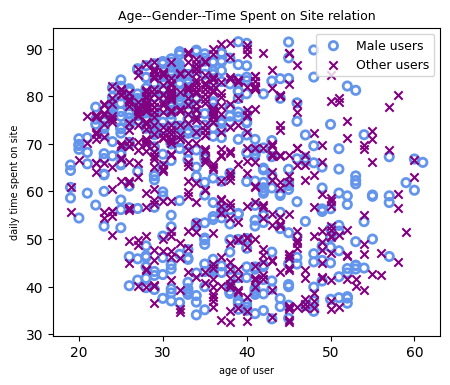

In [23]:
#Same scatter plot as above, with Gender of user being differenciating factor

#get the row numbers where this column is 1 and where its 0
male_users = adv_data['Male'] == 1
other_users = adv_data['Male'] == 0

fig, ax = plt.subplots(1, 1, figsize = (5,4))
ax.scatter(adv_data.loc[male_users,'Age'], adv_data.loc[male_users,'Daily Time Spent on Site'], marker = 'o', label = 'Male users',
          facecolors = 'none', edgecolors = 'cornflowerblue', lw = 2)
ax.scatter(adv_data.loc[other_users, 'Age'], adv_data.loc[other_users, 'Daily Time Spent on Site'], 
           label = 'Other users', marker = "x", c = 'purple')

ax.set_ylabel('daily time spent on site', fontsize = 7)
ax.set_xlabel('age of user', fontsize = 7)
ax.set_title('Age--Gender--Time Spent on Site relation', fontsize = 9)
ax.legend(fontsize = 9)
plt.show()

The gender distribution does not exhibit any special grouping and appears well-distributed over entire plot.

### Relationship between 'time spent on the site' vs 'time spent on internet'

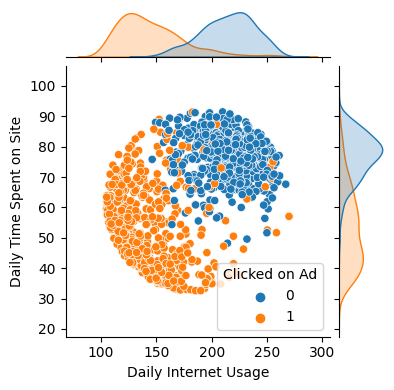

In [57]:
sns.jointplot(data =adv_data, x=adv_data['Daily Internet Usage'], y=adv_data['Daily Time Spent on Site'],
              hue = 'Clicked on Ad', height = 4)
plt.show()

In the code below, I've added a column in the dataset which contains percentage of internet usage time spent on the site.

In [24]:
adv_data['site_time_perc'] = (adv_data['Daily Time Spent on Site']/adv_data['Daily Internet Usage'])*100
#adv_data['site_time_perc'].mean()
adv_data.loc[:,['Daily Time Spent on Site','Daily Internet Usage','site_time_perc']].head(10)

In [36]:
#average percentage of total internet time spent on the site.
adv_data['site_time_perc'].mean()

37.32483275391716

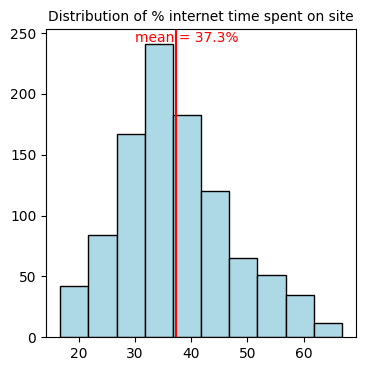

In [31]:
#histogram of percentage time of entire internet usage spent on the site
plt.figure(figsize = (4,4))
plt.hist(adv_data['site_time_perc'], ec = "black", color = "lightblue")
plt.axvline(x = 37.3, color = "red")
plt.text(30, 243, 'mean = 37.3%', color = "red")
plt.title('Distribution of % internet time spent on site', fontsize = 10)
plt.show()

### Seaborn pairplot to visualize relationship between all features

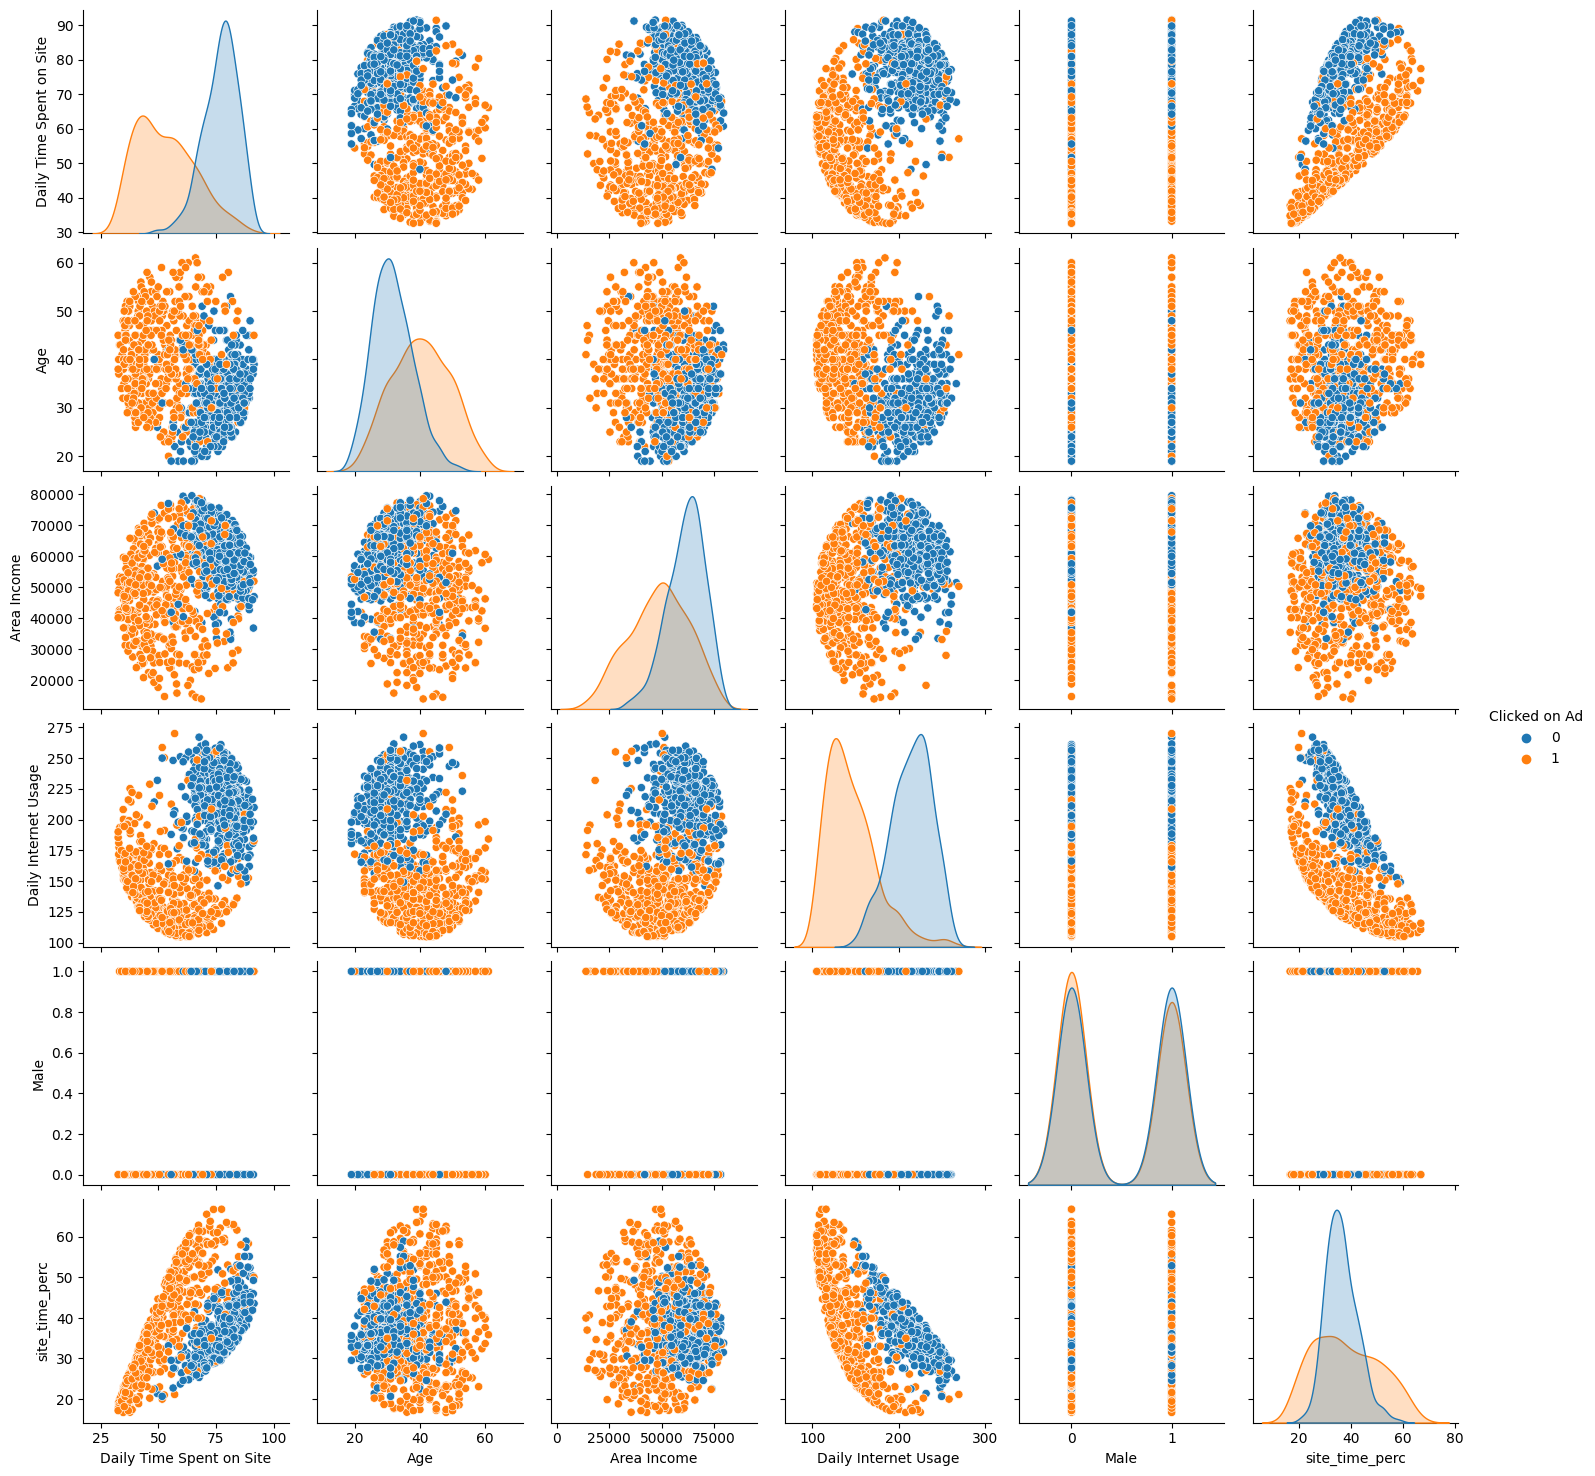

In [53]:
sns.pairplot(adv_data, hue = 'Clicked on Ad')
plt.show()

### II. Model Building

#### 1. Drop insignificant features

In [52]:
adv_data.columns.values

array(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Clicked on Ad'], dtype=object)

In [51]:
adv_data.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp', 'site_time_perc'], axis = 1, inplace = True)

#### 2. Split the output column from rest of the features


In [53]:
X = adv_data.drop('Clicked on Ad', axis = 1)
Y = adv_data['Clicked on Ad']

#### 3. Split the data into training and test sets

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

#### 4. Model training

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
#1. create instance of the class
log_reg = LogisticRegression()
#2. run Gradient descent and fit the parameters
log_reg.fit(X_train, Y_train)

LogisticRegression()

### III. Inference on Test Data

In [60]:
predictions = log_reg.predict(X_test)

### IV. Model Evaluation

In [61]:
from sklearn.metrics import classification_report

In [62]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



#### Normalizing the dataset

In [65]:
from sklearn.preprocessing import StandardScaler

In [72]:
ss = StandardScaler()

In [69]:
print("Training samples before normalization:")
X_train.head(5)

Training samples before normalization:


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
290,50.52,31,72270.88,171.62,0
167,86.06,31,53767.12,219.72,1
486,83.97,40,66291.67,158.42,1
683,76.83,28,67990.84,192.81,0
876,67.39,44,51257.26,107.19,0


In [74]:
print("Training samples after normalization:")
X_train = ss.fit_transform(X_train)
X_train

Training samples after normalization:


array([[-0.90527471, -0.55474969,  1.28856252, -0.17108971, -0.97460798],
       [ 1.34373934, -0.55474969, -0.09277481,  0.94698742,  1.02605357],
       [ 1.21148162,  0.43671784,  0.84220427, -0.47792169,  1.02605357],
       ...,
       [ 0.66409919, -0.88523887,  0.37240837,  1.26962589,  1.02605357],
       [ 0.19708389,  0.76720702,  1.00311603, -1.18131075, -0.97460798],
       [ 0.74763038,  0.32655478,  0.83665317,  1.45326018,  1.02605357]])